In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing

In [4]:
from copy import copy

In [5]:
import os

load_path = "/Users/sumi/_sample_pic/_kaggle/titanic"

In [6]:
train_data = pd.read_csv(load_path + "/train.csv")
test_data = pd.read_csv(load_path + "/test.csv")

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
pd.get_dummies(train_data).astype(float).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
for col in train_data.columns:
    print(col, " : ", train_data[col].isnull().sum())
    
# train_data.info()

PassengerId  :  0
Survived  :  0
Pclass  :  0
Name  :  0
Sex  :  0
Age  :  177
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  0
Cabin  :  687
Embarked  :  2


In [11]:
fillna_train_data = copy(train_data)

In [12]:
fillna_train_data["Age"] = train_data["Age"].fillna(-1)

In [13]:
fillna_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# Age が欠損値の場合には， SibSp と Parch を見て，欠損値を補間する
# Parchのときは，子供の平均値
# SibSpのときは，大人の平均値

In [15]:
null_cols = ["Age"]


# for col in null_cols:
#     print(train_data[col])
#     print(~train_data[col].isnull())

In [35]:
# corr_features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", 'Fare', 'Cabin', 'Embarked']
corr_features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", 'Fare', 'Embarked']
corr_train_data = train_data[corr_features]

In [40]:
corr_train_data = corr_train_data.dropna()
corr_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [41]:
corr_features

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [43]:
# label_enc_columns = ["Sex", "Cabin", "Embarked"]
label_enc_columns = ["Sex", "Embarked"]

for col in label_enc_columns:
#     print(col)
#     print(corr_train_data[col].head())
    le = preprocessing.LabelEncoder()
    le.fit(corr_train_data[col])
    corr_train_data[col] = le.transform(corr_train_data[col])

In [44]:
pd.get_dummies(corr_train_data).astype(float)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
885,0.0,3.0,0.0,39.0,0.0,5.0,29.1250,1.0
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


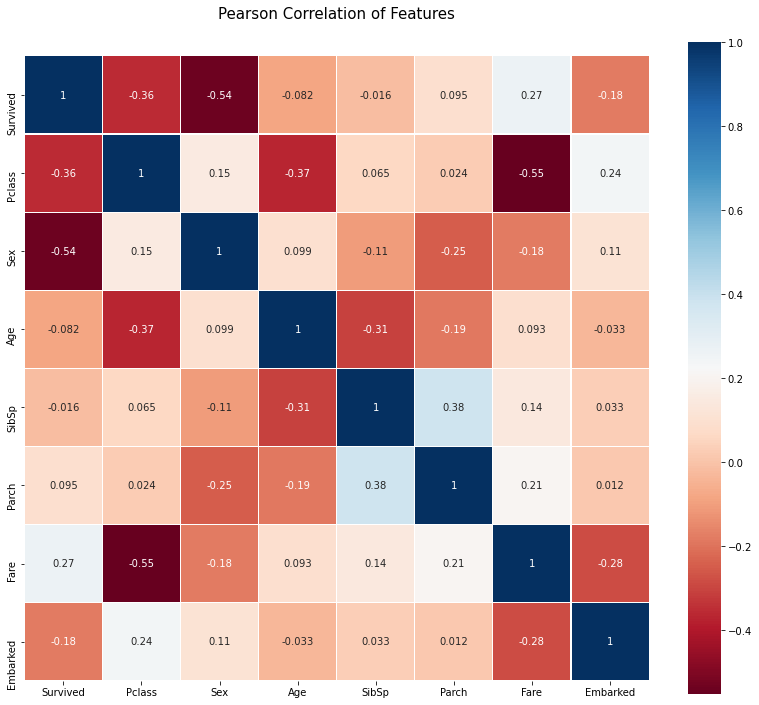

In [45]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(pd.get_dummies(corr_train_data).astype(float).corr(), linewidths=0.1, vmax=1.0,  square=True, cmap=colormap, linecolor='white', annot=True)
sns.heatmap(corr_train_data.corr(), linewidths=0.1, vmax=1.0,  square=True, cmap=colormap, linecolor='white', annot=True)